# Visualizations results

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from utils_visualizations import flatten_data, filter_and_boxplot

# remove waringns
import warnings
warnings.filterwarnings("ignore")

In [10]:
file = "results-xgb-nadja.json"

with open(file) as f:
    data_all = json.load(f)
print(len(data_all))

20


In [11]:
data_all_flatten = flatten_data(data_all)
data = pd.DataFrame(data_all_flatten)
print(data.shape)
print(data.columns)
data.head()

(20, 45)
Index(['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_FD_noise',
       'model_info_transformation', 'model_info_n_groups',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'model_info_json_file',
       'seed', 'repetition', 'random_state', 'hyperparameters_same',
       'unstratified_params_subsample', 'unstratified_params_n_estimators',
       'unstratified_params_min_child_weight', 'unstratified_params_max_depth',
       'unstratified_params_learning_rate', 'unstratified_params_gamma',
       'unstratified_params_colsample_bytree', 'stratified_params_subsample',
       'stratified_params_n_estimators', 'stratified_params_min_child_weight',
       'stratified_params_max_depth', 'stratified_params_learning_rate',
       'stratified_params_gamma', 'stratified_params_colsample_bytree',
       'unstratified_results_train r2', 'unstratified_r

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_results_train mae,unstratified_results_test mae,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,unstratified_running_time,stratified_running_time
0,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,0.4445,1.8505,0.9917,0.7996,0.2334,5.5722,0.3687,1.8823,396.51,425.27
1,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.1018,1.8131,0.9351,0.8137,1.9126,5.1813,1.1018,1.8131,420.56,423.92
2,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,0.9372,1.8472,0.9965,0.8006,0.1020,5.5449,0.2253,1.8762,382.38,466.46
3,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.1615,1.8618,0.9281,0.8035,2.0868,5.4661,1.1615,1.8618,422.41,428.48
4,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.0875,1.8626,0.9311,0.8033,1.9174,5.4705,1.0875,1.8626,440.05,428.97


Do first cleaning of data:

In [12]:
# drop n_train = 500
data = data[data.model_info_n_train!= 500]
print(data.shape)

# duplicates in data
print('duplicates: ', data.duplicated().sum())

# drop duplicates
data = data.drop_duplicates()
print(data.shape)

(20, 45)
duplicates:  0
(20, 45)


## Descriptives

### 1. Model Info

In [13]:
# corresponding model_info variables (categorical):
model_info_variables = ['model_info_model', 'model_info_n_train', 'model_info_n_test',
       'model_info_n_features', 'model_info_FD_noise',
       'model_info_transformation', 'model_info_n_groups',
       'model_info_n_folds', 'model_info_n_iter', 'model_info_n_repetitions',
       'model_info_scoring', 'model_info_n_jobs', 'hyperparameters_same']

# excluded: 'repetition', 'random_state',  'seed', 'model_info_json_file'

Unique Parameter Combinations:

In [14]:
unique_parameter_combinations = data.loc[:, model_info_variables[:-2]].drop_duplicates()
print("There are ", unique_parameter_combinations.shape[0], "parameter combinaitons:")
unique_parameter_combinations

There are  1 parameter combinaitons:


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring
0,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,neg_mean_squared_error


In [15]:
# give summary of every column
data_desciptives = data.loc[:, model_info_variables]
# in data_desciptives make all columns categorical
data_desciptives = data_desciptives.astype('category')
# show summary of every column
data_desciptives.describe(include='all')


,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,model_info_scoring,model_info_n_jobs,hyperparameters_same
count,20,20,20,20,20,20,20,20,20,20,20,20,20
unique,1,1,1,1,1,1,1,1,1,1,1,1,1
top,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,neg_mean_squared_error,-1,False
freq,20,20,20,20,20,20,20,20,20,20,20,20,20


In [16]:
# Display unique values for each column with counts
for column in data_desciptives.columns:
    unique_values = data_desciptives[column].value_counts()
    print(f"\n{unique_values}\n")


model_info_model
XGBRegressor    20
Name: count, dtype: int64


model_info_n_train
1000    20
Name: count, dtype: int64


model_info_n_test
100000    20
Name: count, dtype: int64


model_info_n_features
10    20
Name: count, dtype: int64


model_info_FD_noise
2    20
Name: count, dtype: int64


model_info_transformation
identity    20
Name: count, dtype: int64


model_info_n_groups
10    20
Name: count, dtype: int64


model_info_n_folds
5    20
Name: count, dtype: int64


model_info_n_iter
200    20
Name: count, dtype: int64


model_info_n_repetitions
20    20
Name: count, dtype: int64


model_info_scoring
neg_mean_squared_error    20
Name: count, dtype: int64


model_info_n_jobs
-1    20
Name: count, dtype: int64


hyperparameters_same
False    20
Name: count, dtype: int64



### 2. Evaluation resutls

In [19]:
data.columns
# corresponding variables variables
evaluation_variables = ['unstratified_params_subsample', 'unstratified_params_n_estimators',
       'unstratified_params_min_child_weight', 'unstratified_params_max_depth',
       'unstratified_params_learning_rate', 'unstratified_params_gamma',
       'unstratified_params_colsample_bytree', 'stratified_params_subsample',
       'stratified_params_n_estimators', 'stratified_params_min_child_weight',
       'stratified_params_max_depth', 'stratified_params_learning_rate',
       'stratified_params_gamma', 'stratified_params_colsample_bytree',
       'unstratified_results_train r2', 'unstratified_results_test r2',
       'unstratified_results_train mse', 'unstratified_results_test mse',
       'unstratified_results_train mae', 'unstratified_results_test mae',
       'stratified_results_train r2', 'stratified_results_test r2',
       'stratified_results_train mse', 'stratified_results_test mse',
       'stratified_results_train mae', 'stratified_results_test mae',
       'unstratified_running_time', 'stratified_running_time']
len(evaluation_variables)

28

In [31]:
data_desciptives = data.loc[:, evaluation_variables]
print(data_desciptives.shape)
data_desciptives.describe(include='all')

(20, 28)


,unstratified_params_subsample,unstratified_params_n_estimators,unstratified_params_min_child_weight,unstratified_params_max_depth,unstratified_params_learning_rate,unstratified_params_gamma,unstratified_params_colsample_bytree,stratified_params_subsample,stratified_params_n_estimators,stratified_params_min_child_weight,...,unstratified_results_train mae,unstratified_results_test mae,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,unstratified_running_time,stratified_running_time
count,20.000000,20.000000,20.000000,20.000000,20.000000,0.0,20.000000,20.000000,20.000000,20.00000,...,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.603583,600.850000,6.350000,19.550000,0.026528,NaN,0.718804,0.598721,645.500000,6.10000,...,0.827275,1.85073,0.962565,0.804430,1.046965,5.438905,0.711170,1.857225,439.105000,434.432000
std,0.091965,214.180513,2.539685,33.036622,0.021321,NaN,0.156519,0.105621,194.235478,2.48998,...,0.372222,0.03356,0.030376,0.007445,0.847244,0.206909,0.384901,0.035891,42.395433,21.965371
min,0.503851,133.000000,1.000000,4.000000,0.014530,NaN,0.501710,0.503851,133.000000,1.00000,...,0.125700,1.78380,0.915300,0.789000,0.036700,5.027600,0.125700,1.783800,354.130000,389.120000
25%,0.525955,539.750000,5.000000,4.000000,0.014530,NaN,0.597602,0.525955,573.000000,5.00000,...,0.497000,1.83075,0.934775,0.799375,0.255825,5.290150,0.366625,1.830750,421.947500,416.547500
50%,0.590417,641.500000,7.000000,4.000000,0.014530,NaN,0.683921,0.588656,690.500000,6.00000,...,1.048250,1.84925,0.974250,0.803400,0.733700,5.468300,0.657550,1.862200,439.635000,431.440000
75%,0.724229,722.500000,8.250000,9.250000,0.026528,NaN,0.921948,0.599835,736.500000,8.25000,...,1.091075,1.86470,0.990875,0.809800,1.856950,5.578625,1.074000,1.883325,451.582500,445.910000
max,0.754646,959.000000,9.000000,132.000000,0.062521,NaN,0.921948,0.925012,959.000000,9.00000,...,1.342300,1.92710,0.998600,0.819200,2.198700,5.868200,1.161500,1.927100,564.990000,473.690000


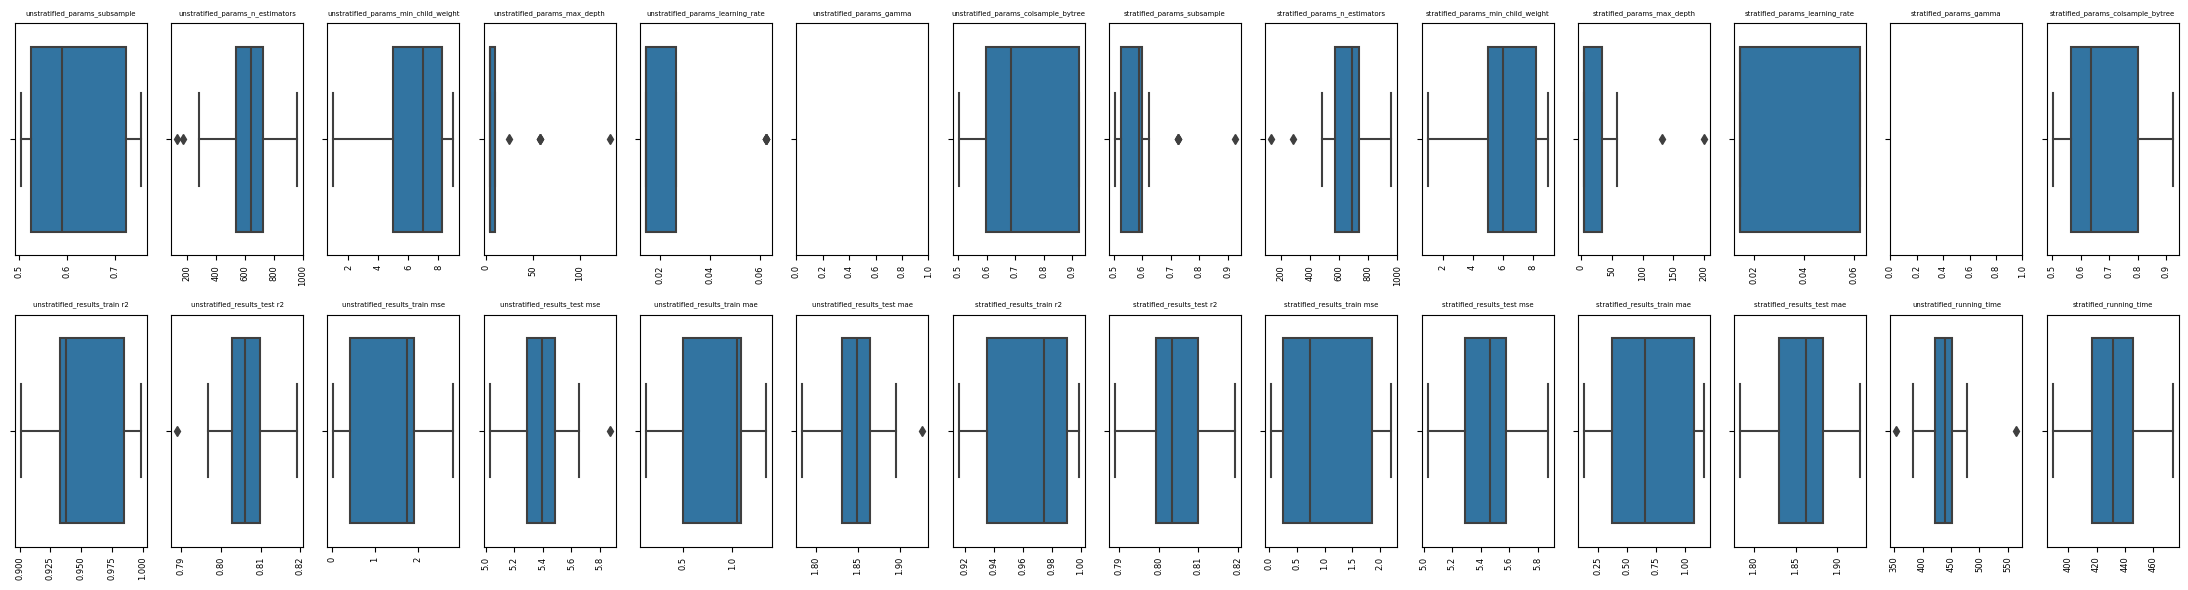

In [34]:
fig, axes = plt.subplots(2, 14, figsize=(22, 6))

for i, column in enumerate(data_desciptives.columns):
    ax = axes[i // 14, i % 14]
    sns.boxplot(x=data_desciptives[column], ax=ax)
    ax.set_title(column, fontsize=5) 
    ax.set_xlabel('', fontsize=5)  
    ax.set_ylabel('', fontsize=5) 
    ax.tick_params(axis='x', rotation=90, labelsize=6)  
    ax.tick_params(axis='y', labelsize=6) 
    #save figure
   

plt.tight_layout()
plt.savefig('./plots/boxplot_all_variables.png', dpi=300, bbox_inches='tight') 
plt.show()
    

#### Boxplots Evaluation metrics

In [36]:
data

,model_info_model,model_info_n_train,model_info_n_test,model_info_n_features,model_info_FD_noise,model_info_transformation,model_info_n_groups,model_info_n_folds,model_info_n_iter,model_info_n_repetitions,...,unstratified_results_train mae,unstratified_results_test mae,stratified_results_train r2,stratified_results_test r2,stratified_results_train mse,stratified_results_test mse,stratified_results_train mae,stratified_results_test mae,unstratified_running_time,stratified_running_time
0,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,0.4445,1.8505,0.9917,0.7996,0.2334,5.5722,0.3687,1.8823,396.51,425.27
1,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.1018,1.8131,0.9351,0.8137,1.9126,5.1813,1.1018,1.8131,420.56,423.92
2,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,0.9372,1.8472,0.9965,0.8006,0.1020,5.5449,0.2253,1.8762,382.38,466.46
3,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.1615,1.8618,0.9281,0.8035,2.0868,5.4661,1.1615,1.8618,422.41,428.48
4,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.0875,1.8626,0.9311,0.8033,1.9174,5.4705,1.0875,1.8626,440.05,428.97
5,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,0.7570,1.8262,0.9665,0.8114,0.9547,5.2462,0.7570,1.8262,444.83,414.16
6,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.0490,1.8273,0.9370,0.8101,1.7782,5.2804,1.0490,1.8273,461.16,456.25
7,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,0.5087,1.8384,0.9841,0.8088,0.4445,5.3163,0.5087,1.8384,419.95,440.72
8,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,0.4619,1.8952,0.9869,0.7967,0.3470,5.6545,0.4619,1.8952,441.31,434.52
9,XGBRegressor,1000,100000,10,2,identity,10,5,200,20,...,1.0479,1.8710,0.9383,0.8014,1.7203,5.5234,1.0479,1.8710,477.78,443.81


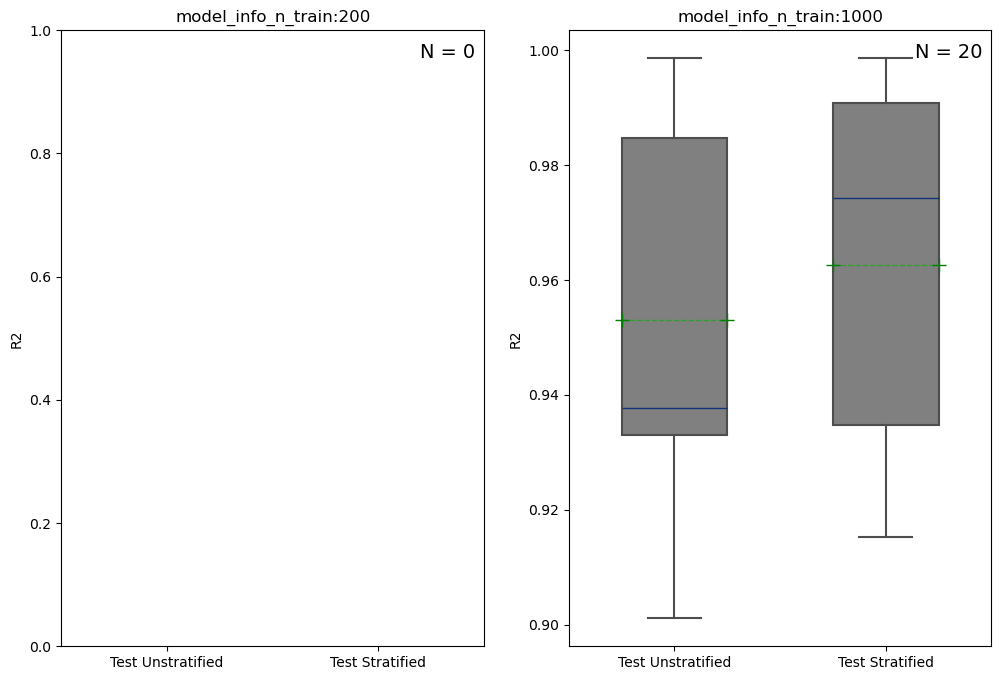

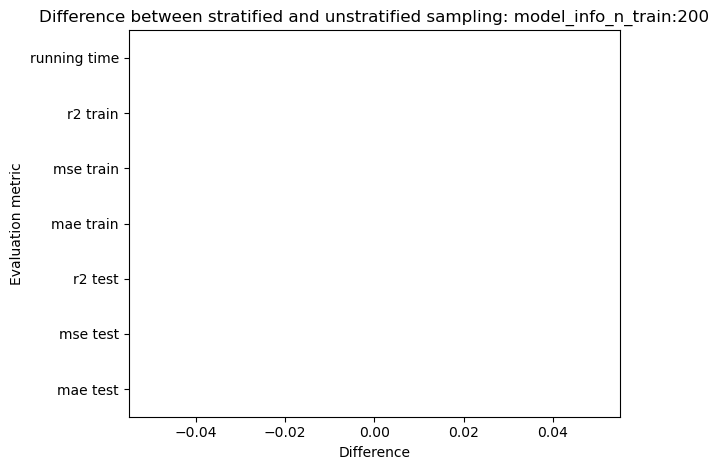

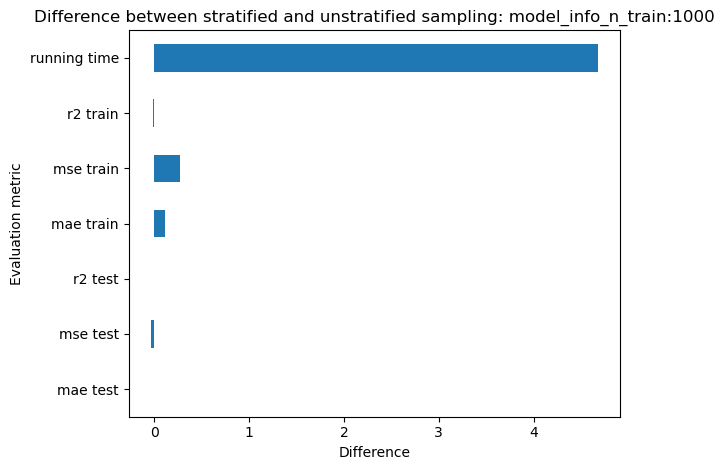

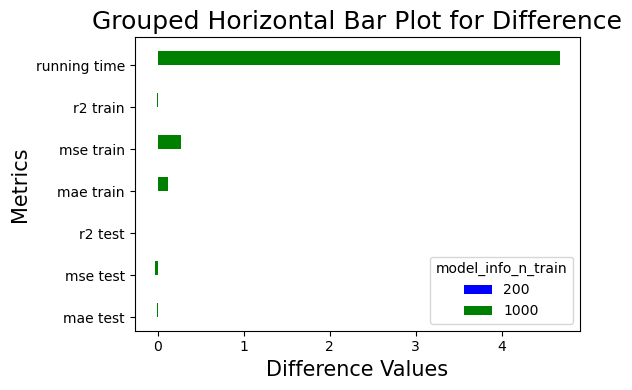

              Unstratified  Stratified  difference
mae test               NaN         NaN         NaN
mse test               NaN         NaN         NaN
r2 test                NaN         NaN         NaN
mae train              NaN         NaN         NaN
mse train              NaN         NaN         NaN
r2 train               NaN         NaN         NaN
running time           NaN         NaN         NaN
              Unstratified  Stratified  difference
mae test          1.857225    1.850730   -0.006495
mse test          5.438905    5.404485   -0.034420
r2 test           0.804430    0.805675    0.001245
mae train         0.711170    0.827275    0.116105
mse train         1.046965    1.314885    0.267920
r2 train          0.962565    0.952970   -0.009595
running time    434.432000  439.105000    4.673000


In [40]:
parameter_grid = {
    "model_info_model": 'XGBRegressor',
    "model_info_transformation": 'identity',
    "model_info_n_train": None,
    "model_info_n_features": 10,
    "model_info_n_groups": 10,
    "model_info_n_folds": 5,
    "model_info_n_iter": 200,
    "model_info_FD_noise": 2,
    "model_info_scoring": 'neg_mean_squared_error'
}
value1 = 200
value2 = 1000

df1, df2 = filter_and_boxplot(data, parameter_grid, value1, value2)
print(df1)
print(df2)